# HW3
## Question 1
### Tim Demetriades
#### K-means
Implement the K-means algorithm.

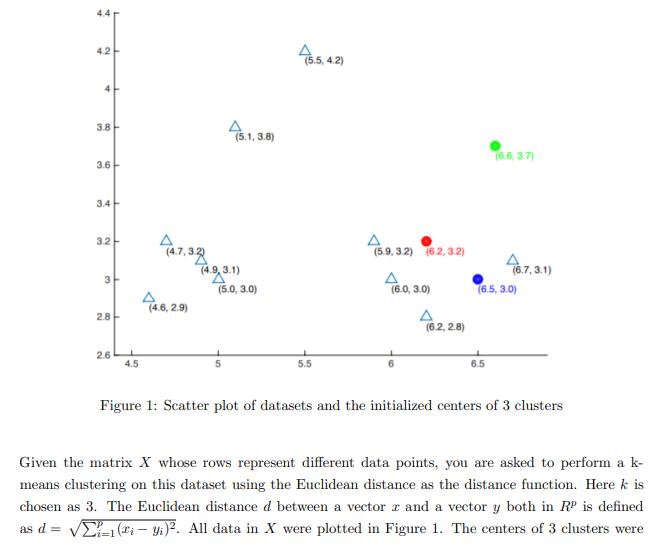
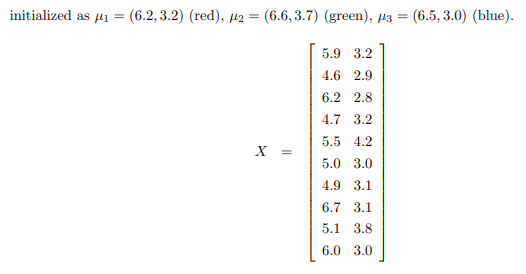

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
x = np.array([[5.9, 3.2],
              [4.6, 2.9],
              [6.2, 2.8],
              [4.7, 3.2],
              [5.5, 4.2],
              [5.0, 3.0],
              [4.9, 3.1],
              [6.7, 3.1],
              [5.1, 3.8],
              [6.0, 3.0]])

In [3]:
means = np.array([[6.2, 3.2],
                  [6.6, 3.7],
                  [6.5, 3.0]])

In [4]:
K = 3
iterations = 10
stopping_threshold = 0.001

In [5]:
centroids = {}    # dict for centroids
for i in range(K):
    centroids[i] = means[i]

In [6]:
def plot_data(title=False, run=0):
    plt.figure(figsize = (5, 5))
    if title:
        plt.title(f'Run Number: {run}')
    plt.scatter(x[:, 0], x[:, 1], s=100, c='lightblue')
    plt.scatter(centroids[0][0], centroids[0][1], s=150, c='red')
    plt.scatter(centroids[1][0], centroids[1][1], s=150, c='green')
    plt.scatter(centroids[2][0], centroids[2][1], s=150, c='blue')
    plt.show

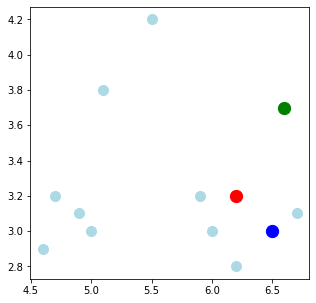

In [7]:
plot_data()

Run 1

Center of 1st Cluster: [5.17142857 3.17142857]
Center of 2nd Cluster: [5.5 4.2]
Center of 3rd Cluster: [6.45 2.95]

Run 2

Center of 1st Cluster: [4.8  3.05]
Center of 2nd Cluster: [5.3 4. ]
Center of 3rd Cluster: [6.2   3.025]

Run 3

Center of 1st Cluster: [4.8  3.05]
Center of 2nd Cluster: [5.3 4. ]
Center of 3rd Cluster: [6.2   3.025]

Done!
Number of iterations needed: 3



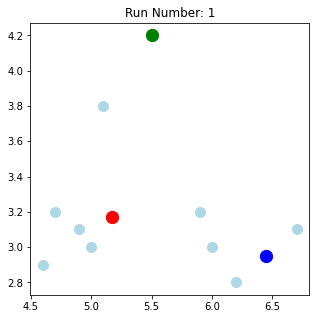

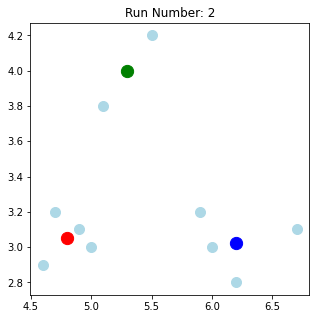

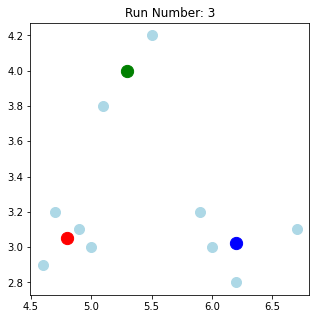

In [8]:
# K-means clustering
for iter in range(iterations):
    print(f'Run {iter+1}\n')
    
    clusters = {}    # clear clusters dict
    
    for i in range(K):
        clusters[i] = []    # each value in dict is an empty list
        
    # get distance from each point to each mean
    # we will classify the point to the cluster with the closest mean
    for sample in x:
        distances = []
        for centroid in centroids:
            distances.append(sqrt(np.sum((sample - centroids[centroid]) ** 2)))    # euclidean distance
        cluster = distances.index(min(distances))    # get index of min distance for each sample
        clusters[cluster].append(sample)
    
    # store old centroids for checking if done
    old_centroids = dict(centroids) 
    
    # calculate new centroids
    for cluster in clusters:
        centroids[cluster] = np.average(clusters[cluster], axis=0)
    
    print(f'Center of 1st Cluster: {centroids[0]}')
    print(f'Center of 2nd Cluster: {centroids[1]}')
    print(f'Center of 3rd Cluster: {centroids[2]}\n')
    
    # plot data with new means
    plot_data(title=True, run=iter+1)
    
    # check if done
    done = True
    for centroid in centroids:
        original_centroid = old_centroids[centroid]
        current_centroid = centroids[centroid]
    
        centroid_difference = abs(np.sum(((current_centroid - original_centroid) / original_centroid) * 100))    # calculate difference
        if centroid_difference > stopping_threshold:
            done = False
            
    if done:
        print('Done!')
        print(f'Number of iterations needed: {iter+1}\n')
        break

#### 1. What’s the center of the first cluster (red) after one iteration? (Answer in the format of [x1, x2], round results to three decimal places, same as part (2) and (3) )

The center of the first cluster (red) after one iteration is:

**[5.171, 3.171]**

#### 2. What’s the center of the second cluster (green) after two iteration?

The center of the second cluster (green) after two iterations is:

**[5.300, 4.0000]**

#### 3. What’s the center of the third cluster (blue) when the clustering converges?

The center of the third cluster (blue) when the clustering converges is:

**[6.200, 3.025]**

#### 4. How many iterations are required for the clusters to converge?

With our algorithm above, the clusters converge to a solution after **3 iterations**. More specifically, it reaches a solution on the 2nd iteration, but does not realize this until the 3rd iteration when it calculates new centroids that are in the same position as the centroids in the previous iteration.